# **IMPORT DATA**

## **Read Data**

In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Read data
data = pd.read_csv("netflix_reviews.csv")

# Show data
data

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,Terrible app I can't watch anything because of...,1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727
1,1a7ce341-afc6-46da-9d08-793582e8ed3c,Ivan Berry,"I love 💕💕 to download it,,😭",5,0,NaN,2024-07-07 17:47:19,NaN
2,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,Exceptional,5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727
3,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,Can't even make it through a full episode of a...,2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727
4,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,Great,5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221
...,...,...,...,...,...,...,...,...
113615,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
113616,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
113617,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
113618,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


## **Data Information**

In [3]:
# Show data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113620 entries, 0 to 113619
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113620 non-null  object
 1   userName              113618 non-null  object
 2   content               113618 non-null  object
 3   score                 113620 non-null  int64 
 4   thumbsUpCount         113620 non-null  int64 
 5   reviewCreatedVersion  96981 non-null   object
 6   at                    113620 non-null  object
 7   appVersion            96981 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


# **DATA PREPROCESSING**

The first step after importing data is to process the data. Data processing involves two things, i.e:
- Checking for missing values
- Checking for duplication in the data.

## **Data Cleaning**

### **Missing Value Check**

- Model Performance: Missing values can significantly affect the performance of machine learning models. In NLP, if parts of the text are missing, it could lead to **incomplete information** for **model training** and **predictions**.
- Bias: Missing data can introduce **bias**, leading to **incorrect conclusions** or **predictions**.

In [4]:
# Show missing value
data.isnull().sum()

,0
reviewId,0
userName,2
content,2
score,0
thumbsUpCount,0
reviewCreatedVersion,16639
at,0
appVersion,16639


In [5]:
# Drop missing value
data = data.dropna()
data.isnull().sum()

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


### **Duplicate Value Check**

- Redundancy: Duplicate entries can lead to redundancy, causing the model to give more importance to repeated information.
- Bias: Duplication can skew the model’s understanding of the text, leading to overfitting or biased results.

In [6]:
# Show data duplicated
data_duplicated = data.duplicated().sum()
data_duplicated

226

In [7]:
# Drop data duplicated
data = data.drop_duplicates()
data_duplicated = data.duplicated().sum()
data_duplicated

0

In [8]:
data

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,Terrible app I can't watch anything because of...,1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727
2,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,Exceptional,5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727
3,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,Can't even make it through a full episode of a...,2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727
4,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,Great,5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221
5,bdd267b4-4231-4a5d-b369-3ac9e5082fc5,Mirza Irfan,Your device is not part of the Netflix Househo...,1,0,8.120.0 build 10 50712,2024-07-05 17:09:39,8.120.0 build 10 50712
...,...,...,...,...,...,...,...,...
113612,9996579a-cf67-40a6-94eb-9ccd63c7d46a,dady mon mari,How can I delete one of the users? Please. Hel...,3,0,8.104.0 build 5 50619,2024-03-01 04:54:36,8.104.0 build 5 50619
113613,f2e61d1c-21eb-44d2-924c-35df26ed3bd2,Romnick Arcangel,Good app in easy to use,5,0,8.96.1 build 16 50568,2023-12-22 22:08:03,8.96.1 build 16 50568
113614,cbb04dd9-1a1d-46df-80a4-8ae987fe5d85,Ciaran Worthington,Everytime I watch a show it goes so dark so I ...,1,0,7.48.0 build 10 34747,2020-08-22 14:58:10,7.48.0 build 10 34747
113616,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250


In [9]:
# Show data content
data['content']

,content
0,Terrible app I can't watch anything because of...
2,Exceptional
3,Can't even make it through a full episode of a...
4,Great
5,Your device is not part of the Netflix Househo...
...,...
113612,How can I delete one of the users? Please. Hel...
113613,Good app in easy to use
113614,Everytime I watch a show it goes so dark so I ...
113616,I love Netflix. I always enjoy my time using it.


# **TEXT PREPROCESSING**

In text processing, it is split into 6 steps sequentially, i.e:
- **Case Folding**
- **Cleaning**
- **Tokenizing**
- **Lemmatization**
- **Stop Removal**
- **Labeling**

## **Case Folding**

The first thing to do is case folding. Case folding is changing sentences that have **capital letters** into **lowercase letters**. This will have an impact on the results of the analysis.

In [10]:
# Define case folding function
def case_folding(text):
    # Convert to lowercase
    text_lower = text.lower()
    # Return the value
    return text_lower

# Apply case folding function
data['content'] = data['content'].apply(case_folding)
# Show data
data['content']

,content
0,terrible app i can't watch anything because of...
2,exceptional
3,can't even make it through a full episode of a...
4,great
5,your device is not part of the netflix househo...
...,...
113612,how can i delete one of the users? please. hel...
113613,good app in easy to use
113614,everytime i watch a show it goes so dark so i ...
113616,i love netflix. i always enjoy my time using it.


## **Cleansing**

Then perform data cleansing by removing extra punctuation, numbers, and spaces.

In [11]:
# Import regular expression library
import re

In [12]:
# Defince cleansing function
def cleansing(text_lower):
    # Remove hashtag
    text_cleans = re.sub(r'#\w+', '', text_lower)
    # Remove URLs
    text_cleans = re.sub(r'http\S+', '', text_cleans)
    # Remove mentions
    text_cleans = re.sub(r'@\w+', '', text_cleans)
    # Keep only alphabets and whitespace
    text_cleans = re.sub(r'[^A-Za-z\s]', '', text_cleans)
    # Remove non-ASCII
    text_cleans = text_cleans.encode('ascii', 'ignore').decode('utf-8')
    # Remove extra whitespace
    text_cleans = re.sub(r'\s+', ' ', text_cleans).strip()
    # Return the value
    return text_cleans

# Apply cleansing function
data['content'] = data['content'].apply(cleansing)
# Show data
data['content']

,content
0,terrible app i cant watch anything because of ...
2,exceptional
3,cant even make it through a full episode of a ...
4,great
5,your device is not part of the netflix househo...
...,...
113612,how can i delete one of the users please help me
113613,good app in easy to use
113614,everytime i watch a show it goes so dark so i ...
113616,i love netflix i always enjoy my time using it


## **Tokenizing**

After the data have been cleaned, each sentence's words are transformed into **tokens** according to **spaces** or **punctuation signs**.

In [13]:
# Import natural language library
import nltk
# Import tokenize library
from nltk.tokenize import word_tokenize
# Download punkt tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
# Define tokenizing function
def tokenizing(text_cleans):
    # Convert to token
    tokens = word_tokenize(text_cleans)
    # Return the value
    return tokens

# Apply tokenizing function
data['content'] = data['content'].apply(tokenizing)
# Show data
data['content']

,content
0,"[terrible, app, i, cant, watch, anything, beca..."
2,[exceptional]
3,"[cant, even, make, it, through, a, full, episo..."
4,[great]
5,"[your, device, is, not, part, of, the, netflix..."
...,...
113612,"[how, can, i, delete, one, of, the, users, ple..."
113613,"[good, app, in, easy, to, use]"
113614,"[everytime, i, watch, a, show, it, goes, so, d..."
113616,"[i, love, netflix, i, always, enjoy, my, time,..."


## **Stop Words Removal**

The process of removing meaningless words, like **articles**, **prepositions**, **conjunctions**, and **other words** that often appear but are not meaningful. This is to reduce the dimensionality of the data and focus only on meaningful words.

In [18]:
nltk.download('stopwords')
# Import stopword library
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def stopword(tokens):
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return filtered_words

data['content'] = data['content'].apply(stopword)
data['content'].head(10)

,content
0,"[terrible, app, cant, watch, anything, househo..."
2,[exceptional]
3,"[cant, even, make, full, episode, show, app, c..."
4,[great]
5,"[device, part, netflix, householde, good, poli..."
6,"[ive, trying, pay, month, since, created, acco..."
7,"[kayla, kwadau]"
8,"[abdulrhamam, sekh]"
9,[good]
10,"[plsssss, stoppppp, giving, screen, limit, lik..."


## **Lemmatization**

This process involved reducing words to their **original words** or dictionary forms (lemma).

In [22]:
nltk.download('wordnet')
# Import lemmatization library
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
def lemmatization(filtered_words):
    # Initialize Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize
    lemmatized_words = [lemmatizer.lemmatize(normal_token) for normal_token in filtered_words]
    return lemmatized_words

data['content'] = data['content'].apply(lemmatization)
data['content'].head(10)

,content
0,"[terrible, app, cant, watch, anything, househo..."
2,[exceptional]
3,"[cant, even, make, full, episode, show, app, c..."
4,[great]
5,"[device, part, netflix, householde, good, poli..."
6,"[ive, trying, pay, month, since, created, acco..."
7,"[kayla, kwadau]"
8,"[abdulrhamam, sekh]"
9,[good]
10,"[plsssss, stoppppp, giving, screen, limit, lik..."


## **Labeling**

Automatic labeling of each word using the VADER Lexicon. Each word will be given a different sentiment score. In this case, each word will be categorized into 3 categories, i.e.:
- Positive, if the **compound value >= 0.05**
- Negative, if the **value -0.05 < compound < 0.05**
- Neutral, if the **compound value <= -0.05**

In [25]:
nltk.download('vader_lexicon')
# Import library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
# Initialize Vader Analyzer
analyzer = SentimentIntensityAnalyzer()

In [27]:
# Function to get sentiment
def vader_sentiment(lemmatized_words):
    # Convert text to string if it's not already
    if isinstance(lemmatized_words, list):
        lemmatized_words = ' '.join(lemmatized_words)
    score = analyzer.polarity_scores(lemmatized_words)
    return score['compound']

In [28]:
# Function to label sentiment based on compound score
def vader_sentiment_label(compound):
    # Label sentiment
    if compound >= 0.05:
        return 'Positive'
    elif compound > -0.05 and compound < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

In [29]:
data['vader_sentiment'] = data['content'].apply(vader_sentiment)
data['vader_sentiment_label'] = data['vader_sentiment'].apply(vader_sentiment_label)
data[['content', 'vader_sentiment', 'vader_sentiment_label']].head(10)

,content,vader_sentiment,vader_sentiment_label
0,"[terrible, app, cant, watch, anything, househo...",-0.6705,Negative
2,[exceptional],0.0000,Neutral
3,"[cant, even, make, full, episode, show, app, c...",-0.1280,Negative
4,[great],0.6249,Positive
5,"[device, part, netflix, householde, good, poli...",0.1779,Positive
6,"[ive, trying, pay, month, since, created, acco...",0.1531,Positive
7,"[kayla, kwadau]",0.0000,Neutral
8,"[abdulrhamam, sekh]",0.0000,Neutral
9,[good],0.4404,Positive
10,"[plsssss, stoppppp, giving, screen, limit, lik...",0.7269,Positive


Label encoding is a process used to **convert categorical labels** into **numeric** form so that they can be fed into machine learning models. In the context of NLP and sentiment analysis, label encoding is often used to convert text labels (like "Positive," "Negative," and "Neutral") into numerical values.

In [30]:
# Import library
from sklearn.preprocessing import LabelEncoder

In [31]:
# Label Encoding
label_encoder = LabelEncoder()
data['vader_sentiment_label_encoded'] = label_encoder.fit_transform(data['vader_sentiment_label'])
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,vader_sentiment,vader_sentiment_label,vader_sentiment_label_encoded
0,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,"[terrible, app, cant, watch, anything, househo...",1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727,-0.6705,Negative,0
2,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,[exceptional],5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727,0.0000,Neutral,1
3,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,"[cant, even, make, full, episode, show, app, c...",2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727,-0.1280,Negative,0
4,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,[great],5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221,0.6249,Positive,2
5,bdd267b4-4231-4a5d-b369-3ac9e5082fc5,Mirza Irfan,"[device, part, netflix, householde, good, poli...",1,0,8.120.0 build 10 50712,2024-07-05 17:09:39,8.120.0 build 10 50712,0.1779,Positive,2


# **EXPLORATORY DATA ANALYSIS**

In [32]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

### **Distribution of Score**

<ipython-input-33-7e4fb77df5fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="score", data=data, palette='Set3')


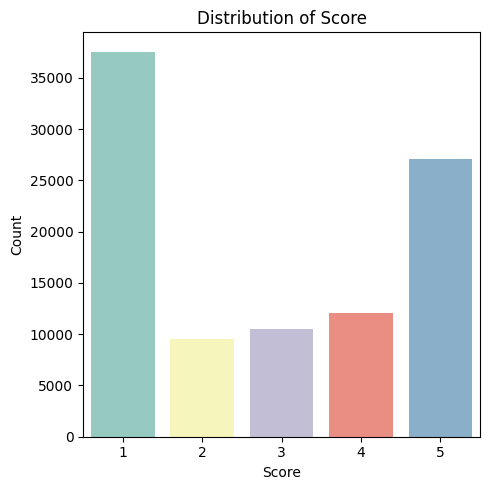

In [33]:
plt.figure(figsize=(5, 5))
sns.countplot(x="score", data=data, palette='Set3')
plt.title('Distribution of Score', fontsize=12)
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## **Proportion of Sentiment**

Exploring labels to find out the sentiment proportion of each category

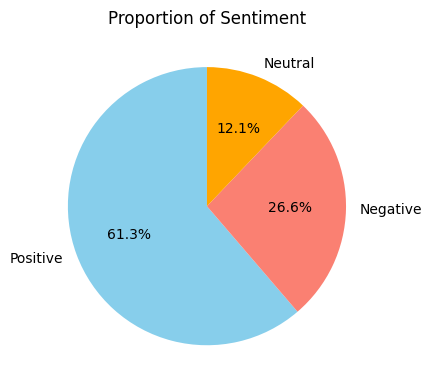

In [34]:
# Pie Chart
plt.figure(figsize=(8, 4))
data['vader_sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'orange'])
plt.title('Proportion of Sentiment', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

## **Word Cloud**

A word cloud helps in visualizing the most frequent words in the dataset. This can give an immediate sense of what the text data is about.

In [35]:
# Import word cloud library
from wordcloud import WordCloud, STOPWORDS

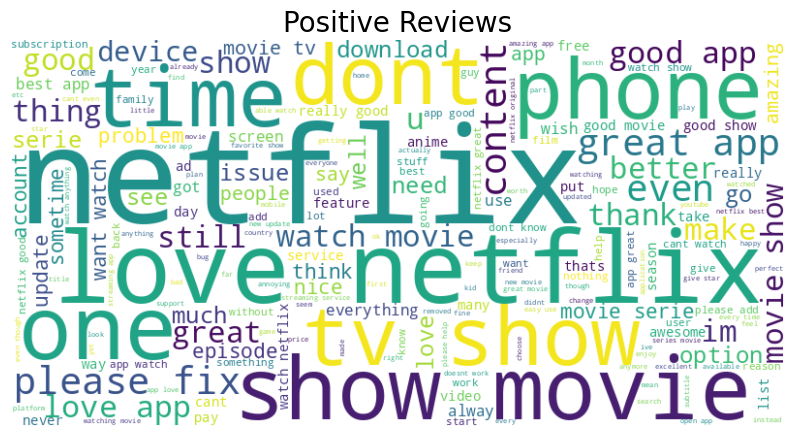

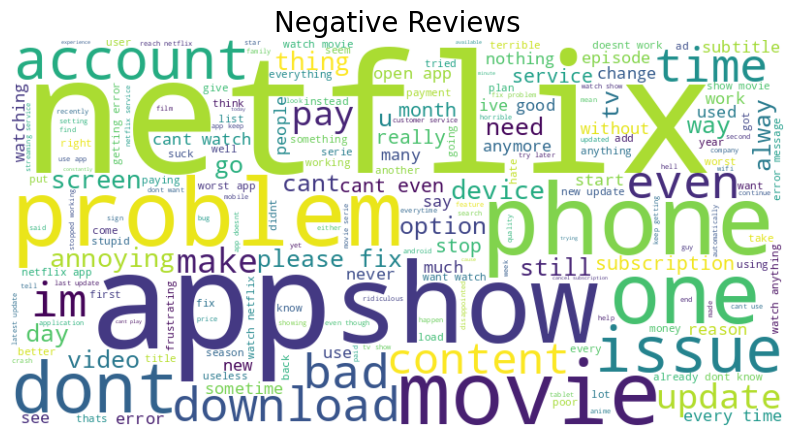

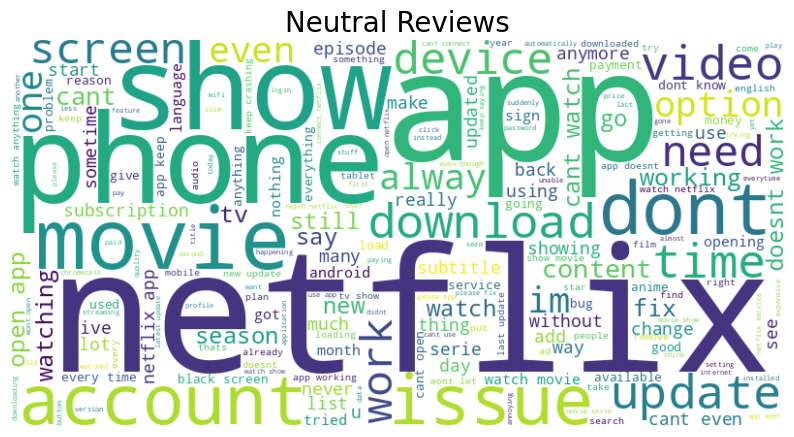

In [37]:
def create_wordcloud(lemmatized_words, title=None):
    # Join all text elements into a single string, handling potential lists within the Series
    all_text = " ".join( " ".join(text_item) if isinstance(text_item, list) else text_item for text_item in lemmatized_words)
    stop_words = set(STOPWORDS.union(set(stopwords.words('english'))))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

# Create Word Clouds for each sentiment
positive_reviews = data[data['vader_sentiment_label'] == 'Positive']['content']
negative_reviews = data[data['vader_sentiment_label'] == 'Negative']['content']
neutral_reviews = data[data['vader_sentiment_label'] == 'Neutral']['content']

create_wordcloud(positive_reviews, "Positive Reviews")
create_wordcloud(negative_reviews, "Negative Reviews")
create_wordcloud(neutral_reviews, "Neutral Reviews")

# **FEATURE EXTRACTION**

## **CountVectorizer**

Extraction of features that **transform text** into a **matrix of token counts.** It counts the number of occurrences of each word in the document. In other words, it **converts text data** into a **numerical representation** for modeling.

In [38]:
# Import library
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# Function Vectorizer
def vectorizer(lemmatized_words):
    # Convert text to string if it's not already
    if isinstance(lemmatized_words[0], list):
        lemmatized_words = [' '.join(doc) for doc in lemmatized_words]

    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(lemmatized_words)
    return X, vectorizer

In [40]:
X_counts, count_vectorizer = vectorizer(data['content'])

## **Change to TF-IDF**

It converts the **token count matrix** from CountVectorizer into **TF-IDF representation**. It not only considers the word frequency, but also how **unique** or **important** a word is in all documents.

In [41]:
# Import library
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
# Function to change representation to TF-IDF
def tfidf_transformer(X_counts):
    # Initialize TF-IDF Transformer
    transformer = TfidfTransformer()
    X_tfidf = transformer.fit_transform(X_counts)
    return X_tfidf

# Inisialize TF-IDF
X_tfidf = tfidf_transformer(X_counts)
print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (96753, 40814)


# **SPLIT DATA**

Partitioned data into training data and testing data randomly. The training data is 80% of the total data, while the testing data is 20% of the overall data.

In [46]:
# Import library
from sklearn.model_selection import train_test_split

In [47]:
y = data['vader_sentiment_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [48]:
print(X_train.toarray()[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
print(X_test.toarray()[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [50]:
print(y_train.head())

86258    2
97186    2
72919    1
32864    2
70266    2
Name: vader_sentiment_label_encoded, dtype: int64


In [51]:
print(y_test.head())

69627    2
50960    2
43295    1
46308    2
38955    0
Name: vader_sentiment_label_encoded, dtype: int64


# **MODELLING**

Machine learning modeling using **Multinomial Logistic Regression** and **Multinomial Naïve Bayes** algorithms

## **Multinomial Logistic Regression**

### **Build Model**

The **Stochastic Average Gradient Descent** (sag) optimization technique is used to minimize the cost function. This technique is suitable for **large data**.

The Basic Idea:
- Calculates the probability of each class (positive, negative, and neutral) using a softmax activation function. This activation function ensures that the total probability is 1
- Model coefficients are optimized using a 'sag' optimization technique that iteratively updates by considering the average gradient of the training data

In [52]:
# Import library
from sklearn.linear_model import LogisticRegression

In [53]:
# Build Model
model_mlg = LogisticRegression(multi_class='multinomial',
                               solver='sag')

### **Train Model**

In [54]:
# Train Model
model_mlg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

## **Naive Bayes Multinomial**

### **Build Model**

Multinomial Naïve Bayes algorithm is a commonly used algorithm for solving text processing cases.

Basic idea:
- The prediction of naive bayes requires that each conditional probability cannot be zero. To avoid this problem, an alpha parameter called Laplacian Smoothing/Correction can be set.
- The model learns the prior probability distribution which provides information about the parameter distribution. By setting fit_prior to True, the model will estimate the class odds from the training data.
- Similarly to alpha, force_alpha when set to True, alpha will be added when a feature does not appear in a particular class during training.

In [55]:
# Import library
from sklearn.naive_bayes import MultinomialNB

In [56]:
# Build Model
model_nbm = MultinomialNB(alpha = 1,
                          fit_prior = True,
                          force_alpha = True)

### **Train Model**

In [57]:
# Train Model
model_nbm.fit(X_train, y_train)

MultinomialNB(alpha=1)

# **MODEL EVALUATION**

The model was evaluated with several considerations, i.e:
- **Classification evaluation metrics**
- **AUC score**
- **Classification Report**

## **Multinomial Logistic Regression**

### **Predict**

The steps in making predictions are as follows:
- Calculate the linear combination between features and weights (parameters) added with bias.
- Using softmax activation function to get the probability of each class (positive, negative, and neutral).
- Calculating the loss function using "sag" to get the chance of class prediction.
- Update using gradient descent by iteration until converged.

In [58]:
# Predict
y_pred_mlg = model_mlg.predict(X_test)
y_pred_mlg

array([2, 2, 1, ..., 2, 2, 1])

### **Probability**

In [59]:
# Probability
y_prob_mlg = model_mlg.predict_proba(X_test)
print(y_prob_mlg)

[[0.00600136 0.00105659 0.99294205]
 [0.1893026  0.06791439 0.742783  ]
 [0.28309772 0.36323925 0.35366303]
 ...
 [0.00178745 0.0018218  0.99639075]
 [0.05758902 0.06216167 0.88024931]
 [0.11034019 0.65579814 0.23386167]]


### **Evaluation Metric**

In [60]:
# Import library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [61]:
# Evaluation Metric
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlg)}')
print(f'Precision: {precision_score(y_test, y_pred_mlg, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_mlg, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred_mlg, average="weighted")}')

Accuracy: 0.8841403545036433
Precision: 0.8827079290941716
Recall: 0.8841403545036433
F1-Score: 0.8829385661873285


### **Confusion Matrix**

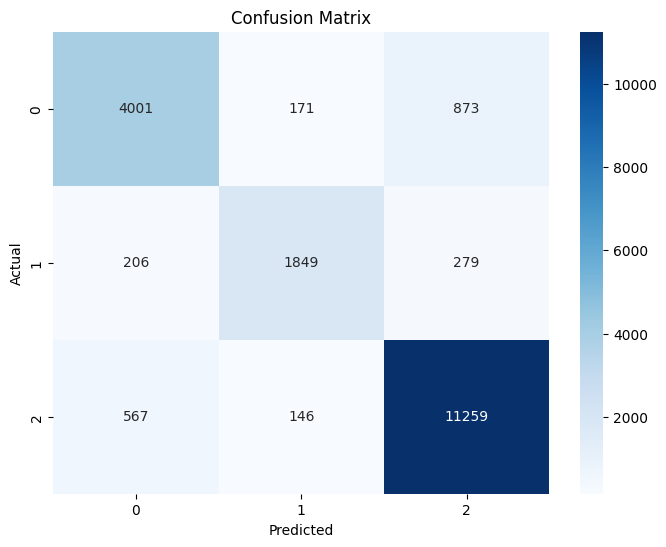

In [62]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_mlg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model_mlg.classes_, yticklabels=model_mlg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **ROC Score**

In [63]:
# Import library
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [64]:
# ROC Score
mlg_roc_auc = roc_auc_score(y_test, y_prob_mlg, multi_class='ovr')
print(f'ROC AUC Score: {mlg_roc_auc}')

ROC AUC Score: 0.9452340751225373


### **ROC Curve**

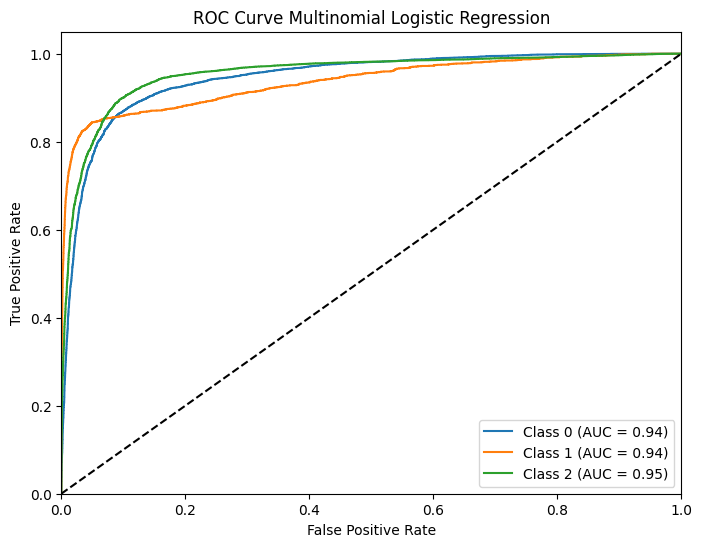

In [65]:
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model_mlg.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model_mlg.predict_proba(X_test)[:, i])  # Use predict_proba for multi-class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(model_mlg.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Multinomial Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### **Classification Report**

In [66]:
# Import library
from sklearn.metrics import classification_report

In [67]:
# Classification Report
print(classification_report(y_test, y_pred_mlg))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      5045
           1       0.85      0.79      0.82      2334
           2       0.91      0.94      0.92     11972

    accuracy                           0.88     19351
   macro avg       0.87      0.84      0.85     19351
weighted avg       0.88      0.88      0.88     19351



## **Naive Bayes Multinomial**

### **Predict**

The steps in making predictions are as follows:
- Calculate the prior probability of each class, which is the proportion of documents in that class to the total number of documents.
- Calculate the likelihood of each features (words) based on the frequency of the word in the documents of that class.
- Calculating predictions with the class that has the highest likelihood that will be selected as the prediction class.

In [68]:
# Predict
y_pred_nbm = model_nbm.predict(X_test)
y_pred_nbm

array([2, 2, 2, ..., 2, 2, 2])

### **Probability**

In [69]:
# Probability
y_prob_nbm = model_nbm.predict_proba(X_test)
print(y_prob_nbm)

[[0.08021062 0.00582751 0.91396187]
 [0.21034246 0.03174683 0.75791072]
 [0.17440449 0.04158244 0.78401306]
 ...
 [0.03366728 0.00823769 0.95809503]
 [0.04090234 0.00489655 0.95420111]
 [0.1695457  0.09220592 0.73824838]]


### **Evaluation Metric**

In [70]:
# Evaluation Metric
print(f'Accuracy: {accuracy_score(y_test, y_pred_nbm)}')
print(f'Precision: {precision_score(y_test, y_pred_nbm, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_nbm, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred_nbm, average="weighted")}')

Accuracy: 0.6928324117616661
Precision: 0.6890335483965938
Recall: 0.6928324117616661
F1-Score: 0.6221364238167609


### **Confusion Matrix**

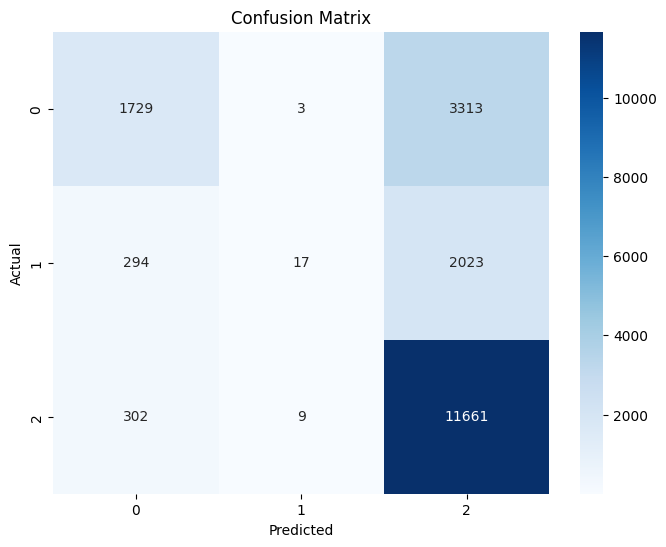

In [71]:
# Confusion Matrix
con_mat = confusion_matrix(y_test, y_pred_nbm)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model_nbm.classes_, yticklabels=model_nbm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **ROC Score**

In [72]:
# ROC Score
nbm_roc_auc = roc_auc_score(y_test, y_prob_nbm, multi_class='ovr')
print(f'ROC AUC Score: {nbm_roc_auc}')

ROC AUC Score: 0.8604770735198083


### **ROC Curve**

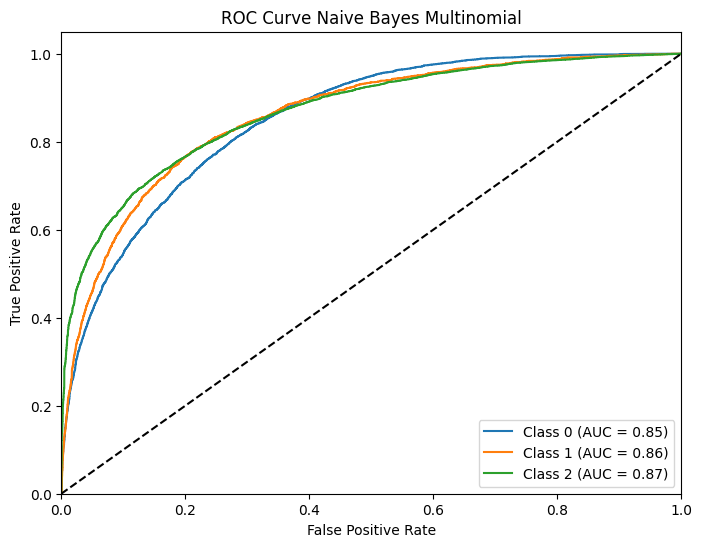

In [73]:
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model_nbm.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model_nbm.predict_proba(X_test)[:, i])  # Use predict_proba for multi-class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(model_nbm.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naive Bayes Multinomial')
plt.legend(loc="lower right")
plt.show()

### **Classification Report**

In [74]:
# Classification Report
print(classification_report(y_test, y_pred_nbm))

              precision    recall  f1-score   support

           0       0.74      0.34      0.47      5045
           1       0.59      0.01      0.01      2334
           2       0.69      0.97      0.81     11972

    accuracy                           0.69     19351
   macro avg       0.67      0.44      0.43     19351
weighted avg       0.69      0.69      0.62     19351



## **Score Comparison**

In [75]:
score_comparison = pd.DataFrame({'Model': ['Multinomial Logistic Regression', 'Naive Bayes Multinomial'],
                                'Accuracy': [accuracy_score(y_test, y_pred_mlg), accuracy_score(y_test, y_pred_nbm)],
                                'Precision': [precision_score(y_test, y_pred_mlg, average="weighted"), precision_score(y_test, y_pred_nbm, average="weighted"),],
                                'Recall': [recall_score(y_test, y_pred_mlg, average="weighted"), recall_score(y_test, y_pred_nbm, average="weighted")],
                                'F1-Score': [f1_score(y_test, y_pred_mlg, average="weighted"), f1_score(y_test, y_pred_nbm, average="weighted")],
                                'ROC AUC Score': [mlg_roc_auc, nbm_roc_auc]})
score_comparison

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
0,Multinomial Logistic Regression,0.884140,0.882708,0.884140,0.882939,0.945234
1,Naive Bayes Multinomial,0.692832,0.689034,0.692832,0.622136,0.860477
